In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[0], 'GPU')

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3510017410039344437
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1745302324
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1457626757329873506
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

%matplotlib inline

In [4]:
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(
    label_mode='fine'
)

In [6]:
x_train.shape

(50000, 32, 32, 3)

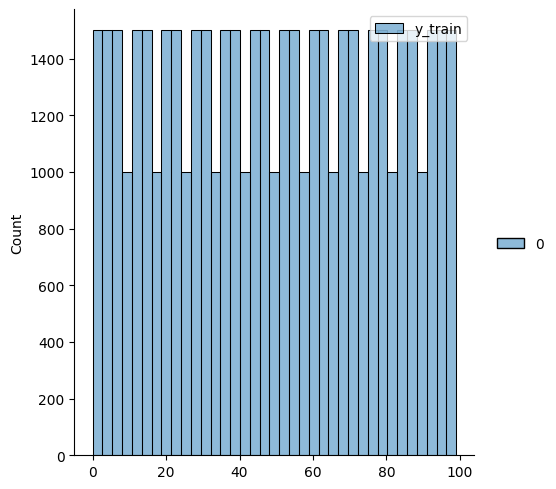

In [7]:
sns.displot(y_train, label='y_train')
plt.legend() 

In [8]:
unique_labels = np.unique(y_train)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

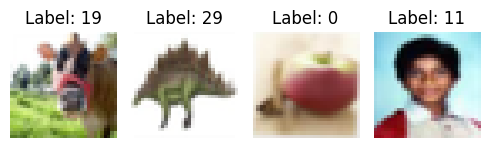

In [9]:
# Plotting 4 images in a row
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])  # Display the image
    plt.title(f"Label: {y_train[i][0]}")  # Show the label
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [11]:
# Initialize OneHotEncoder
encoder = OneHotEncoder()

In [12]:
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.transform(y_test).toarray()
y_val = encoder.transform(y_val).toarray()

In [13]:
x_train.shape

(37500, 32, 32, 3)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X_train = x_train.astype('float32') / 255.0
X_val = x_val.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

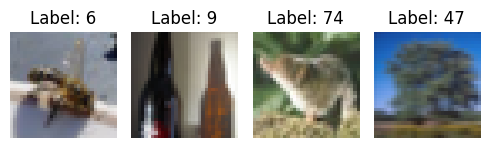

In [16]:
# Plotting 4 images in a row
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])  # Display the image
    original_label = encoder.inverse_transform([y_train[i]])
    
    plt.title(f"Label: {original_label[0][0]}")
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [17]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
#     Conv2D(32, (3, 3), activation='relu', padding='same'),
#     MaxPooling2D(),

#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     MaxPooling2D(),

#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     MaxPooling2D(),

#     Flatten(),

#     Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     Dropout(0.5),

#     Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     Dropout(0.5),

#     Dense(100, activation='softmax')
# ])

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(100, activation='softmax'))



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

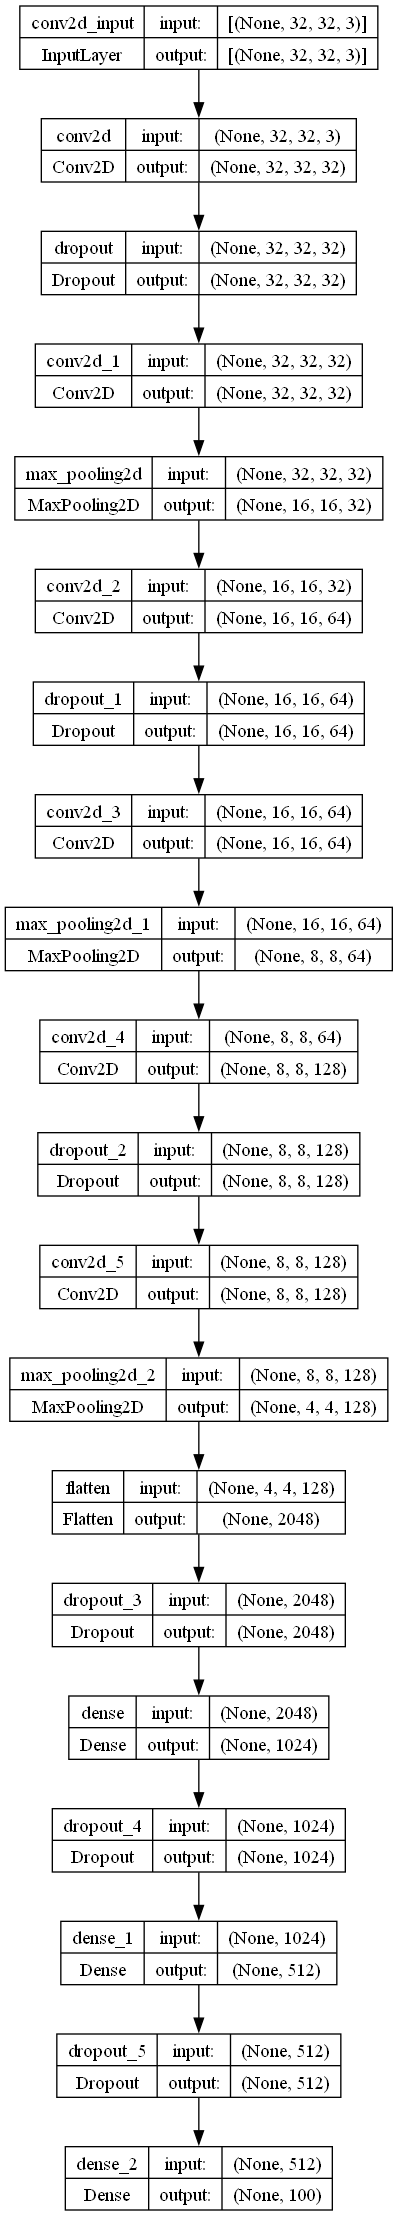

In [19]:
plot_model(model, show_shapes=True)

In [20]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/50
1172/1172 [==============================] - 18s 13ms/step - loss: 4.6636 - accuracy: 0.0238 - val_loss: 4.3459 - val_accuracy: 0.0501
Epoch 2/50
1172/1172 [==============================] - 14s 12ms/step - loss: 4.1412 - accuracy: 0.0673 - val_loss: 3.9765 - val_accuracy: 0.1058
Epoch 3/50
1172/1172 [==============================] - 14s 12ms/step - loss: 3.8410 - accuracy: 0.1170 - val_loss: 3.7748 - val_accuracy: 0.1482
Epoch 4/50
1172/1172 [==============================] - 14s 12ms/step - loss: 3.5794 - accuracy: 0.1581 - val_loss: 3.5146 - val_accuracy: 0.1991
Epoch 5/50
1172/1172 [==============================] - 14s 12ms/step - loss: 3.3736 - accuracy: 0.1915 - val_loss: 3.3225 - val_accuracy: 0.2284
Epoch 6/50
1172/1172 [==============================] - 14s 12ms/step - loss: 3.2015 - accuracy: 0.2224 - val_loss: 3.2024 - val_accuracy: 0.2515
Epoch 7/50
1172/1172 [==============================] - 14s 12ms/step - loss: 3.0487 - accuracy: 0.2518 - val_loss: 3.0765 -

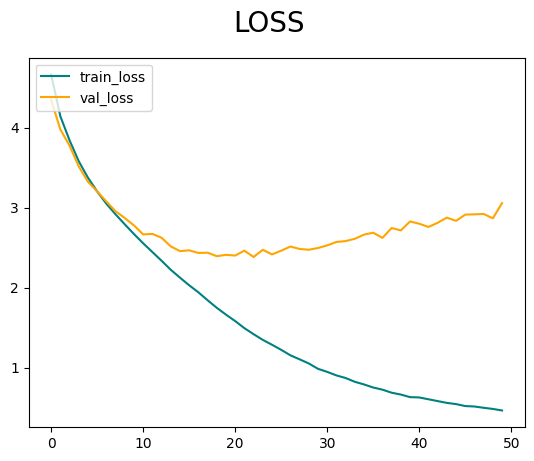

In [22]:
fig = plt.figure()
plt.plot(history.history["loss"], color='teal', label='train_loss')
plt.plot(history.history["val_loss"], color='orange', label='val_loss')
plt.suptitle('LOSS',fontsize=20)
plt.legend(loc="upper left")
plt.show()

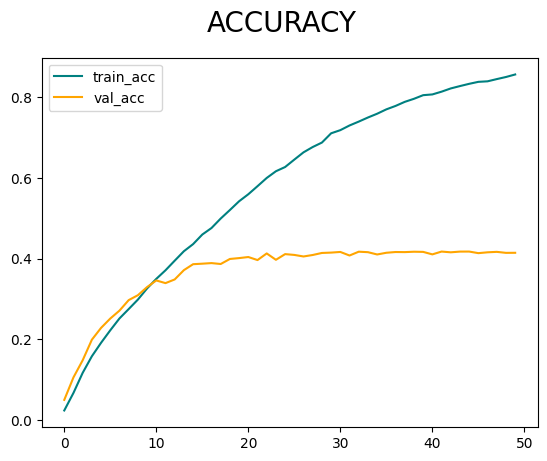

In [23]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='train_acc')
plt.plot(history.history['val_accuracy'],color='orange', label='val_acc')
plt.suptitle('ACCURACY',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss}")

313/313 [==============================] - 1s 4ms/step - loss: 3.0620 - accuracy: 0.4156
Test Accuracy: 41.56%
Test Loss: 3.062012195587158


In [25]:
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# import numpy as np

# # Assuming you have predictions for x_test stored in y_pred
# y_pred = model.predict(x_test)
# y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted classes

# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred_classes)

# # Define class labels (if available)
# class_labels = unique_labels

# # Create a heatmap
# plt.figure(figsize=(20, 20))
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

In [26]:
model.save('model.h5')